In [9]:
import pandas as pd
import numpy as np
import time
from pandas.tseries.offsets import DateOffset
from binance.client import Client
from datetime import datetime as dt
import os
from sklearn.preprocessing import StandardScaler
import pickle
import joblib
import matplotlib.pyplot as plt
import yfinance as yf

# GOLD

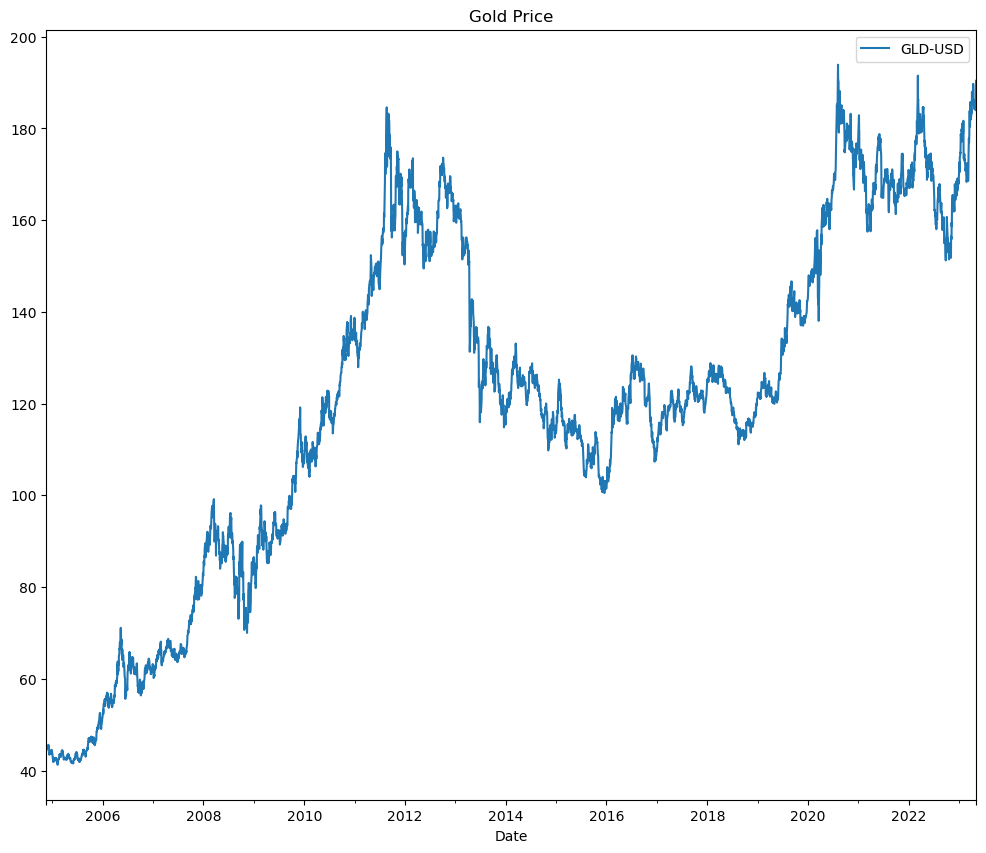

In [10]:
def get_gold_data():
    df_dates = pd.DataFrame(pd.date_range(
        '1988-12-01', pd.to_datetime('today').date()), columns=['Date'])
    df_dates.set_index('Date', inplace=True)
    # Hämta historiska guldprisdata (GLD är ticker-symbolen för SPDR Gold Shares ETF)
    gld_data = yf.download('GLD', end=dt.today().date(), progress=False)
    # gld_data.set_index('Date', inplace=True)

    # Behåll endast 'Close' priser och döp om kolumnen till 'GLD-USD'
    gld_data = gld_data[['Close']].rename(columns={'Close': 'GLD-USD'})

    df_dates = pd.DataFrame(pd.date_range(start=gld_data.index[0], end=pd.to_datetime( # type: ignore
        'today').date(), freq='D'), columns=['Date'])  # type: ignore

    df_dates.set_index('Date', inplace=True)
    gld_data = df_dates.merge(gld_data, how='left',
                              left_on='Date', right_index=True)
    # interpolating missing values
    gld_data.interpolate(method='linear', inplace=True)
    return gld_data

df_gold=get_gold_data()
df_gold.plot(figsize=(12, 10), title='Gold Price')
plt.show()


# Inflation

In [11]:
def initiate_data(inflation, df_dates, lang_dict, value_name):
    # display(inflation)
    inflation = inflation.melt(
        id_vars=['Year'], var_name='month', value_name=value_name)

    # use lang_dict to translate month names to numbers
    inflation['month'] = inflation['month'].map(lang_dict)

    inflation['Date'] = pd.to_datetime(inflation['Year'].astype(
        str) + '-' + inflation['month'].astype(str))
    inflation.set_index('Date', inplace=True)
    inflation.drop(['Year', 'month'], axis=1, inplace=True)
    inflation = df_dates.merge(
        inflation, how='left', left_on='Date', right_index=True)
    inflation.set_index('Date', inplace=True)
    inflation[value_name] = inflation[value_name].astype(str)
    inflation[value_name] = inflation[value_name].str.replace(',', '.')
    inflation[value_name] = inflation[value_name].str.replace(
        chr(8209), chr(45))
    inflation[value_name] = inflation[value_name].astype(float)
    inflation[value_name].interpolate(method='linear', inplace=True)
    return inflation


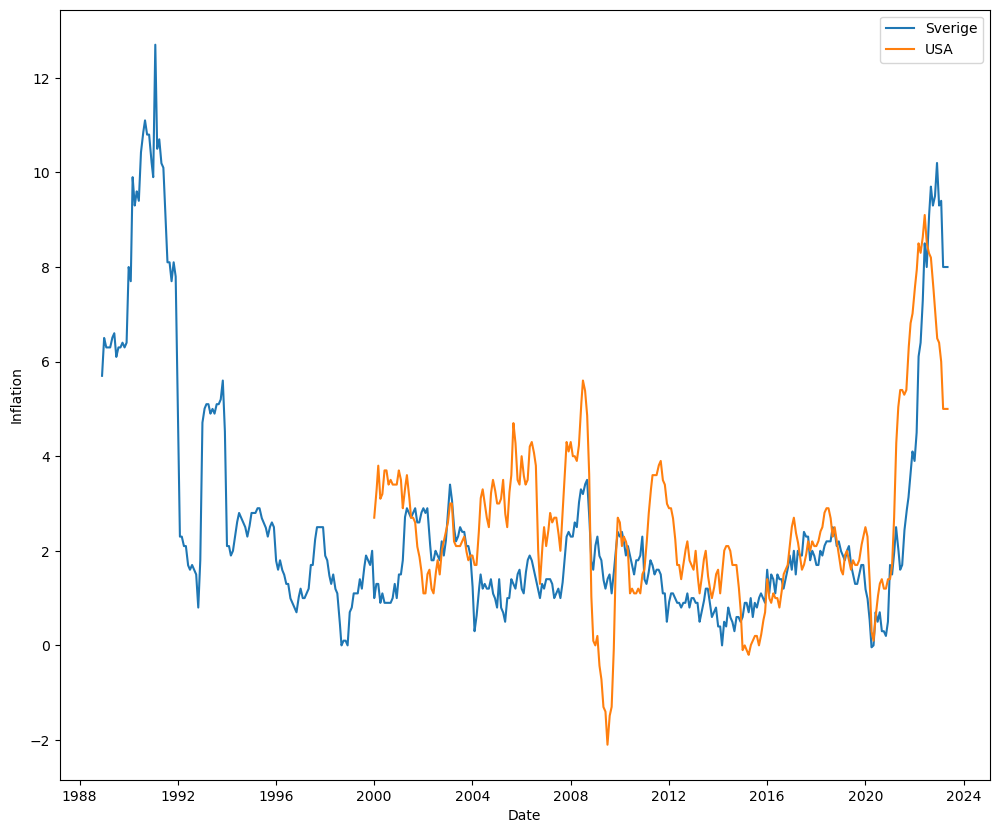

GLÖM INTE HORIZONS I PP(...)
GLÖM INTE HORIZONS I PP(...)
GLÖM INTE HORIZONS I PP(...)
GLÖM INTE HORIZONS I PP(...)
GLÖM INTE HORIZONS I PP(...)
GLÖM INTE HORIZONS I PP(...)


In [12]:

def get_inflation_data(graph=False):
    # Explain this function here
    # Create a dataframe with dates from 1988-12-01 to today
    df_dates = pd.DataFrame(pd.date_range(
        '1988-12-01', pd.to_datetime('today').date()), columns=['Date'])

    US_inflation = pd.read_html(
        'https://www.usinflationcalculator.com/inflation/current-inflation-rates/')
    US_inflation = US_inflation[0]
    # replace the cell including string starting with "Avail" with the NaN
    US_inflation.replace(to_replace=r'^Avail.*$',
                         value=np.nan, regex=True, inplace=True)
    # set the first row as the header and drop the first row
    US_inflation.columns = US_inflation.iloc[0]
    US_inflation.drop(US_inflation.index[0], inplace=True)
    US_inflation.drop('Ave', axis=1, inplace=True)

    # SE_inflation = pd.DataFrame()
    SE_inflation = pd.read_html(
        'https://www.scb.se/hitta-statistik/statistik-efter-amne/priser-och-konsumtion/konsumentprisindex/konsumentprisindex-kpi/pong/tabell-och-diagram/konsumentprisindex-med-fast-ranta-kpif-och-kpif-xe/kpif-12-manadersforandring/')
    SE_inflation = SE_inflation[0]
    SE_inflation.rename(columns={'År': 'Year'}, inplace=True)

    se_dict = dict(Jan='1', Feb='2', Mar='3', Apr='4', Maj='5', Jun='6',
                   Jul='7', Aug='8', Sep='9', Okt='10', Nov='11', Dec='12')
    us_dict = dict(Jan='1', Feb='2', Mar='3', Apr='4', May='5', Jun='6',
                   Jul='7', Aug='8', Sep='9', Oct='10', Nov='11', Dec='12')

    SE_inflation = initiate_data(
        SE_inflation, df_dates, se_dict, value_name='SE_inflation')
    # SE_inflation is in percent, divide by 10 to get decimal
    SE_inflation['SE_inflation'] = SE_inflation['SE_inflation'] / 10
    US_inflation = initiate_data(
        US_inflation, df_dates, us_dict,  value_name='US_inflation')

    if graph:
        # Do a simple plot
        fig, ax = plt.subplots(figsize=(12, 10))
        ax.plot(SE_inflation.index,
                SE_inflation['SE_inflation'], label='Sverige')
        ax.plot(US_inflation.index, US_inflation['US_inflation'], label='USA')
        ax.set_xlabel('Date')
        ax.set_ylabel('Inflation')
        ax.legend()
        plt.show()

    # concat and set one column to US_index and the other to SE_index
    inflations = pd.concat([US_inflation, SE_inflation], axis=1).copy()
    inflations = inflations.dropna()
    # inflations = add_horizon_columns(inflations, [75, 90, 250])
    print("GLÖM INTE HORIZONS I PP(...)")
    print("GLÖM INTE HORIZONS I PP(...)")
    print("GLÖM INTE HORIZONS I PP(...)")
    print("GLÖM INTE HORIZONS I PP(...)")
    print("GLÖM INTE HORIZONS I PP(...)")
    print("GLÖM INTE HORIZONS I PP(...)")
    return inflations


df_infl = get_inflation_data(graph=True)


In [32]:

df_file = 'all_tickers.csv'

MAX_MONTHS = 24

def set_start_value(df_file):
    # Check if the DataFrame file exists
    if os.path.exists(df_file):
        # Read the existing DataFrame
        df = pd.read_csv(df_file, index_col=0, parse_dates=True)
        
        # Calculate the number of days between today and the last date in the DataFrame
        today = pd.Timestamp(dt.today())
        last_date = df.index[-1]
        antal_dagar = (today - last_date).days # type: ignore
        
        # Set the start date to the number of days ago
        start = f"{antal_dagar} days ago UTC"
    else:
        # If the DataFrame file does not exist, use 24 months as the default
        df = pd.DataFrame()
        start = f"{MAX_MONTHS} month ago UTC"
    return df, start       


In [33]:
# Get all the tickers from Binance
def get_data():
    # take the time
    start_time = time.time()
    
    api_key = '2jxiCQ8OIWmU4PZH4xfwKEY9KYerDkSWzwNCqoaMzj41eJgWBsSqA3VYqkt2wmdX'
    api_secret = 'YY1Qj1t0JZrE4tQdaBBxT8iwl2tbFalWp1FHjyZ9selBb6OnQ0Oj8aVdiXO7YLMz'

    client = Client(api_key, api_secret)

    # Hämta handelspar
    df, start = set_start_value(df_file)
    print(start)
    if start == '0 days ago UTC':
        return df
    
    symbols = client.get_all_tickers()
    symbols = [
        symbol for symbol in symbols if symbol['symbol'].endswith('USDT')]

    # Sätt upp en tom lista för att lagra close-priser
    close_prices = {}

    # Ange den tidsram du vill ha för historiska data
    interval = Client.KLINE_INTERVAL_1DAY
    
    # Hämta close-priser för alla kryptovalutor
    dates = None

    # progress_bar = st.progress(0)  # Create a progress bar

    for idx, symbol in enumerate(symbols, 1):
        try:
            klines = client.get_historical_klines(
                symbol['symbol'], interval, start)
            if dates is None:
                # Extrahera och konvertera tidsstämplar till datum
                dates = [dt.fromtimestamp(
                    int(kline[0]) / 1000).strftime('%Y-%m-%d') for kline in klines]
            
            close_prices[symbol['symbol']] = [
                float(kline[4]) for kline in klines]
        except Exception as e:
            print(f"Kunde inte hämta data för {symbol['symbol']}: {e}")

        if idx % 10 == 0:
                print(f"This will take several minutes. Symbol number {idx} of {len(symbols)}: . . . . . . . . {symbol['symbol']}")

        # # Update the progress bar
        # if idx+1 == len(symbols):
        #     progress_text = f"Done! last symbol . . . . . . . . {symbol['symbol']} fetched."
        # else:
        #     progress_text = f"This will take several minutes. Symbol number {idx+1} of {len(symbols)}: . . . . . . . . {symbol['symbol']}"
        # progress_bar.progress((idx + 1) / len(symbols), progress_text)
    
    # Konvertera close_prices-dicten till en pandas DataFrame
    # print(close_prices)
    df_new = pd.DataFrame.from_dict(close_prices, orient='index').transpose()
    
    df_new = df_new.dropna(axis=1,how='all')  # remove columns with all nan
    
    # Lägg till datum som index för DataFrame
    
    df_new.index = pd.to_datetime(dates)   # type: ignore
    print(f'Shape of new df {df_new.shape}')
    
    df = pd.concat([df, df_new], axis=0)
    # print the time   
    tot_time = round((time.time() - start_time),1)
    # make it in minutes and seconds
    minutes = tot_time // 60
    seconds = tot_time % 60 
    print(f"Det tog {minutes} minuter och {round(seconds,1)} sekunder att hämta alla kryptovalutor ---")
    return df

df = get_data()
df.to_csv('all_tickers.csv', index=True)


0 days ago UTC


In [34]:
df.sort_index(inplace=True)
print(df.index)
print(sum(df.index.value_counts()>0) == len(df.index))

print('Nu har vi hämtat alla kryptovalutor med Date som index')

DatetimeIndex(['2021-05-06', '2021-05-07', '2021-05-08', '2021-05-09',
               '2021-05-10', '2021-05-11', '2021-05-12', '2021-05-13',
               '2021-05-14', '2021-05-15',
               ...
               '2023-04-27', '2023-04-28', '2023-04-29', '2023-04-30',
               '2023-05-01', '2023-05-02', '2023-05-03', '2023-05-04',
               '2023-05-05', '2023-05-06'],
              dtype='datetime64[ns]', length=731, freq=None)
True
Nu har vi hämtat alla kryptovalutor med Date som index


In [35]:
# Specila preprocessing for crypto data
df = pd.read_csv('all_tickers.csv', index_col=0)

print(df.shape)
# drop the columns where all values are nan
df = df.dropna(axis=1,how='all')
print(df.shape)

s=int(0.9*len(df))

# remove all columns where there are more than s nan values
df = df.dropna(axis=1, thresh=s)

df.shape

(731, 420)
(731, 420)


(731, 223)

In [36]:
print(f'{df.isna().any().sum()} rader med någon nan \n{len(df)-df.isna().any().sum()} rader utan nan')
# df.isna().any().sum()

22 rader med någon nan 
709 rader utan nan


### applicera StandardScaler på alla kolumner (tickers) i df
Använd en .py som skapar nya kolumner och preprocessar data - samma .py överallt
StandardScaler får inte ha NaN's
Skapa en folder för alla StandardScalers som sparas

In [37]:
df.columns

Index(['BTCUSDT', 'ETHUSDT', 'BNBUSDT', 'NEOUSDT', 'LTCUSDT', 'QTUMUSDT',
       'ADAUSDT', 'XRPUSDT', 'EOSUSDT', 'IOTAUSDT',
       ...
       'MASKUSDT', 'LPTUSDT', 'XVGUSDT', 'ATAUSDT', 'GTCUSDT', 'ERNUSDT',
       'KLAYUSDT', 'PHAUSDT', 'BONDUSDT', 'MLNUSDT'],
      dtype='object', length=223)

In [ ]:

from preprocess import preprocess as pp
# kör preprocess(...) och få tillbaka en ny df
df, predictors = pp(df, df_gold, df_infl)


In [ ]:
# Gör en funktion som applicerar StandardScaler() på en ticker och sparar den i en fil uppbyggd av namnet  på ticker.

def fit_and_save_scaler(df, column_name):
    # Kontrollera att kolumnnamnet finns i DataFrame
    if column_name not in df.columns:
        raise ValueError(f"Kolumnen '{column_name}' finns inte i DataFrame")

    # Skapa och träna en StandardScaler med den givna kolumnen
    scaler = StandardScaler()
    scaler.fit(df[[column_name]])

    # Spara StandardScaler i en fil
    file_name = f"scalers/{column_name}_scaler.pkl"
    with open(file_name, 'wb') as f:
        pickle.dump(scaler, f)

    print(f"StandardScaler för kolumn '{column_name}' sparad som '{file_name}'")


# Tester

In [46]:
df = pd.read_csv('all_tickers.csv', index_col=0)
df.index = pd.to_datetime(df.index)
df.shape

(731, 420)

In [47]:
import pandas as pd
s=int(0.9*len(df))
# remove all columns where there are more than s nan values
df = df.dropna(axis=1, thresh=s)
print(f'{df.isna().any().sum()} rader med någon nan \n{len(df)-df.isna().any().sum()} rader utan nan')
# interpolate missing values
df.interpolate(method='linear', inplace=True)
print(f'{df.isna().any().sum()} rader med någon nan \n{len(df)-df.isna().any().sum()} rader utan nan')
df.shape

22 rader med någon nan 
709 rader utan nan
0 rader med någon nan 
731 rader utan nan


(731, 223)

In [30]:
def create_new_columns(df_, ticker, target, trend: bool = True, horizons=[2, 5, 60, 250]):
    '''
    Creates predictors for a given ticker.
    
        df_ is the dataframe with tickers.
        ticker is the ticker to create predictors for.
        target is the target column to create predictors for. : 'y1' or 'y2'
        trend is a boolean to create Trend columns for the target or not.
        horizons is the list of horizons to create predictors for.
        Returns a new dataframe
    '''
    df = df_.copy()

    # Move these lines outside the loop
    df['Tomorrow'] = df[ticker].shift(-1)
    df['After_tomorrow'] = df[ticker].shift(-2)
    df['y1'] = (df['Tomorrow'] > df[ticker]).astype(int)
    df['y2'] = (df['After_tomorrow'] > df[ticker]).astype(int)

    hpref = 'GLD_' if 'GLD' in ticker else 'infl_' if 'inflation' in ticker else ''
    for horizon in horizons:
        rolling_averages = df.rolling(horizon, min_periods=1).mean()

        ratio_column = f"{hpref}Ratio_{horizon}"
        df[ratio_column] = df[ticker] / rolling_averages[ticker]

        rolling = df.rolling(horizon, closed='left', min_periods=1).mean()
        print('innan trend', df.shape)
        if trend:
            trend_column = f"{hpref}Trend_{horizon}"
            target_name = 'Tomorrow' if target == 'y1' else 'After_tomorrow'
            print('target_name =', target_name)
            print('trend_column =', trend_column)
            print("len df.columns", len(df.columns))
            print('innan rolling', df.shape)
            df[trend_column] = rolling[target_name]
            print('efter rolling', df.shape)

    return df


In [ ]:
create_new_columns(df, 'BTCUSDT', 'y1', horizons=[2, 5, 60, 250])

In [75]:
def generate_new_columns(df_, horizons=[2, 5, 60, 250], trend=True):
    df=df_.copy()
    ticker=df.columns[0]
    print('ticker', ticker)
    
    target = 'y1'
    # new_columns = df.rolling(window=2).mean()
    hpref = 'GLD_' if 'GLD' in ticker else 'infl_' if 'inflation' in ticker else ''
    print('hpref', hpref)
    for horizon in horizons:
        rolling_averages = df.rolling(horizon, min_periods=1).mean()

        ratio_column = f"{hpref}Ratio_{horizon}"
        df[ratio_column] = df[ticker] / rolling_averages[ticker]

        rolling = df.rolling(horizon, closed='left', min_periods=1).mean()
        print('innan trend', df.shape)
        if trend:
            trend_column = f"{hpref}Trend_{horizon}"
            print('trend_column =', trend_column)
            target_name = 'Tomorrow' if target == 'y1' else 'After_tomorrow'
            print('target_name =', target_name)
            print('trend_column =', trend_column)
            print("len df.columns", len(df.columns))
            print('innan rolling', df.shape)
            df[trend_column] = rolling[target_name]
            print('efter rolling', df.shape)

    # make new_columns a dataframe
    # new_columns = pd.DataFrame(new_columns)
    return df

In [7]:
def merge_infl_gold(df, df_gold, df_infl):
    df = df.merge(df_infl, left_index=True,
                  right_index=True, how='left')
    df = df.merge(df_gold, left_index=True,
                  right_index=True, how='left')
    return df

In [34]:
df[['BTCUSDT']]

,BTCUSDT
2021-05-06,56393.68
2021-05-07,57314.75
2021-05-08,58862.05
2021-05-09,58240.84
2021-05-10,55816.14
...,...
2023-05-02,28677.82
2023-05-03,29026.16
2023-05-04,28838.16
2023-05-05,29089.83


In [77]:
new_gold = generate_new_columns(df_gold, trend=False).dropna()
new_infl= generate_new_columns(df_infl[['US_inflation']], horizons=[75, 90, 250], trend=False).dropna()
# Loopa igenom alla kolumner i DataFrame
for column_name in df.columns:
    # print(df[[column_name]].head())
    new_columns = generate_new_columns(df[[column_name]]).dropna()
    
    new_columns = new_columns.merge(new_infl, left_index=True, right_index=True,
                                    how='left')
    new_columns = new_columns.merge(new_gold, left_index=True, right_index=True,
                                    how='left')
    # print('new_columns efter merge', new_columns.shape)
    if new_columns.isna().sum().sum() > 0:
        print('new_columns har naN')
    # Skapa en StandardScaler för den nya DataFrame
    scaler = StandardScaler()
    scaled_new_columns = scaler.fit(new_columns)
    
    # Spara StandardScaler som en fil i mappen 'scalers'
    scaler_filename = f'scalers/{column_name}_scaler.joblib'
    joblib.dump(scaler, scaler_filename)
    
    # # Lägg till de nya skala kolumner i DataFrame (valfritt)
    # df = df.join(pd.DataFrame(scaled_new_columns, columns=[
    #              f"{column_name}_scaled"], index=new_columns.index))
    break

ticker GLD-USD
hpref GLD_
innan trend (6744, 2)
innan trend (6744, 3)
innan trend (6744, 4)
innan trend (6744, 5)
ticker US_inflation
hpref infl_
innan trend (8527, 2)
innan trend (8527, 3)
innan trend (8527, 4)
ticker BTCUSDT
hpref 
innan trend (731, 2)
target_name = Tomorrow
trend_column = Trend_2
len df.columns 2
innan rolling (731, 2)


KeyError: 'Tomorrow'

In [74]:
new_columns

,BTCUSDT,Ratio_2,Ratio_5,Ratio_60,Ratio_250,US_inflation,infl_Ratio_75,infl_Ratio_90,infl_Ratio_250,GLD-USD,GLD_Ratio_2,GLD_Ratio_5,GLD_Ratio_60,GLD_Ratio_250
2021-05-06,56393.68,1.000000,1.000000,1.000000,1.000000,5.064516,1.300655,1.409760,2.338474,170.059998,1.008271,1.013694,1.038616,0.987036
2021-05-07,57314.75,1.008100,1.008100,1.008100,1.008100,5.077419,1.291872,1.399429,2.328588,171.589996,1.004478,1.017360,1.046458,0.996219
2021-05-08,58862.05,1.013318,1.023270,1.023270,1.023270,5.090323,1.283334,1.389380,2.318795,171.763331,1.000505,1.013636,1.046353,0.997528
2021-05-09,58240.84,0.994695,1.009324,1.009324,1.009324,5.103226,1.275031,1.379604,2.309091,171.936666,1.000504,1.008284,1.046318,0.998839
2021-05-10,55816.14,0.978741,0.973670,0.973670,0.973670,5.116129,1.266957,1.370092,2.299436,172.110001,1.000504,1.003604,1.046249,1.000090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-02,28677.82,1.010742,0.992165,1.055785,1.338844,5.000000,0.992626,0.970874,0.789182,187.520004,1.009556,1.013556,1.027535,1.109679
2023-05-03,29026.16,1.006037,1.006204,1.064247,1.352887,5.000000,0.993754,0.972898,0.790790,189.110001,1.004222,1.017410,1.034650,1.118364
2023-05-04,28838.16,0.996751,1.002414,1.053230,1.341923,5.000000,0.994789,0.974855,0.792402,190.440002,1.003504,1.018084,1.040169,1.125467
2023-05-05,29089.83,1.004345,1.012171,1.058119,1.351236,5.000000,0.995733,0.976744,0.794019,187.460007,0.992114,0.998721,1.022418,1.107185
